In [84]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

Importing Libraries

In [85]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Fitting Model to the training set  and testing set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, confusion_matrix, accuracy_score as acc, f1_score, recall_score, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from itertools import cycle
warnings.filterwarnings('ignore') 
from scipy.stats import mode
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix


In [86]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
%cd /content/drive/My Drive/Colab Notebooks/Machine Learning/Midterm/

/content/drive/My Drive/Colab Notebooks/Machine Learning/Midterm


In [88]:
!ls

DT.png	  heart.csv  LDA.png  QDA.png
fig3.png  KNN.png    NB.png   Rashmi_Padalkar_1299028_Midterm.ipynb


In [89]:
#Load the data file
Data = pd.read_csv("heart.csv") 

In [90]:
Data.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [91]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   270 non-null    int64  
 1   Column2   270 non-null    int64  
 2   Column3   270 non-null    int64  
 3   Column4   270 non-null    int64  
 4   Column5   270 non-null    int64  
 5   Column6   270 non-null    int64  
 6   Column7   270 non-null    int64  
 7   Column8   270 non-null    int64  
 8   Column9   270 non-null    int64  
 9   Column10  270 non-null    float64
 10  Column11  270 non-null    int64  
 11  Column12  270 non-null    int64  
 12  Column13  270 non-null    int64  
 13  Column14  270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [92]:
Data.isnull().sum()

Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
dtype: int64

In [93]:
Data.describe()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [94]:
Data['Column14'].value_counts()

1    150
2    120
Name: Column14, dtype: int64

In [95]:
#Creating the variable x and y
x = Data.drop('Column14', axis=1)
y = Data['Column14']

In [96]:
#split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(216, 13)
(216,)
(54, 13)
(54,)


Defination for Classifier

In [97]:
def Evaluate_Model(Classifier, Classifier_Name,X_train, X_test,y_train,y_test):

  y_score = Classifier.fit(X_train, y_train)
  y_pred = Classifier.predict(X_test)
  y_pred1 = Classifier.predict(X_train)
  y_probs = Classifier.predict_proba(X_test)[::,1]
  Train =  metrics.accuracy_score(y_train, y_pred1)
  Test =  metrics.accuracy_score(y_test, y_pred)
  print(Classifier_Name)
  print("\n")
  print("Model accuracy(in %) for Training:",Train)
  print("Model accuracy(in %) for Testing:",Test)
  print("\n")
    
  cm = confusion_matrix(y_test,y_pred)
    
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
  print('Sensitivity: ', sensitivity)
    
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
  print('Specificty: ', specificity)
 
  precision = precision_score(y_test, y_pred)
  print('Precision: ', precision)

  recall = recall_score(y_test, y_pred)
  print('Recall: ', recall)

  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  FP = cm.sum(axis=0) - np.diag(cm) 
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)  
  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  total=sum(sum(cm))
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = (TP/(TP+FN))/total
  # Specificity or true negative rate
  TNR = (TN/(TN+FP))/total 
  print('\n')
  print('Sensitivity:' ,TPR)
  print('Specificity: ' ,TNR)
  print('\n')
  Result = classification_report(y_test,y_pred)
  print('Classification Report:')
  print(Result)
  print('\n')
  print("Overall Accurancy for",Classifier_Name, ": ", accuracy_score(y_test,y_pred))
  print('\n')
  print('Confusion Matrix')
  plot_confusion_matrix(Classifier, X_test, y_test)  
  plt.show()

In [98]:
Classifier_LDA = LinearDiscriminantAnalysis()
Classifier_QDA = QuadraticDiscriminantAnalysis()
Classifier_NB = GaussianNB()
Classifier_DT = DecisionTreeClassifier()
Classifier_KNN = KNeighborsClassifier()

LDA

LDA


Model accuracy(in %) for Training: 0.8703703703703703
Model accuracy(in %) for Testing: 0.7592592592592593


Sensitivity:  0.8
Specificty:  0.7083333333333334
Precision:  0.7741935483870968
Recall:  0.8
F1:  0.7868852459016393


Sensitivity: [0.01481481 0.01311728]
Specificity:  [0.01311728 0.01481481]


Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.80      0.79        30
           2       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54



Overall Accurancy for LDA :  0.7592592592592593


Confusion Matrix


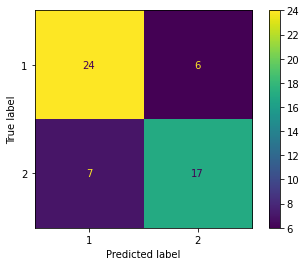

In [99]:
Evaluate_Model(Classifier_LDA, "LDA",X_train ,X_test,y_train,y_test)

QDA

QDA


Model accuracy(in %) for Training: 0.8981481481481481
Model accuracy(in %) for Testing: 0.7777777777777778


Sensitivity:  0.8
Specificty:  0.75
Precision:  0.8
Recall:  0.8
F1:  0.8000000000000002


Sensitivity: [0.01481481 0.01388889]
Specificity:  [0.01388889 0.01481481]


Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



Overall Accurancy for QDA :  0.7777777777777778


Confusion Matrix


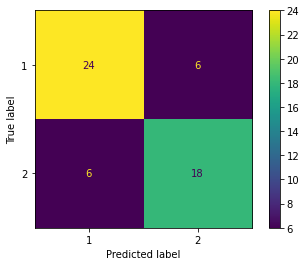

In [100]:
Evaluate_Model(Classifier_QDA, "QDA",X_train ,X_test,y_train,y_test)

NB

NB


Model accuracy(in %) for Training: 0.8796296296296297
Model accuracy(in %) for Testing: 0.7407407407407407


Sensitivity:  0.7666666666666667
Specificty:  0.7083333333333334
Precision:  0.7666666666666667
Recall:  0.7666666666666667
F1:  0.7666666666666667


Sensitivity: [0.01419753 0.01311728]
Specificity:  [0.01311728 0.01419753]


Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.71      0.71      0.71        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



Overall Accurancy for NB :  0.7407407407407407


Confusion Matrix


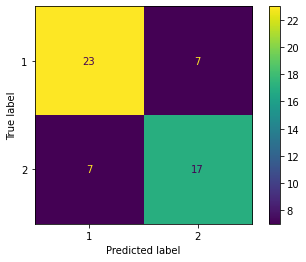

In [101]:
Evaluate_Model(Classifier_NB, "NB",X_train ,X_test,y_train,y_test)

DT

DT


Model accuracy(in %) for Training: 1.0
Model accuracy(in %) for Testing: 0.8333333333333334


Sensitivity:  0.8333333333333334
Specificty:  0.8333333333333334
Precision:  0.8620689655172413
Recall:  0.8333333333333334
F1:  0.847457627118644


Sensitivity: [0.0154321 0.0154321]
Specificity:  [0.0154321 0.0154321]


Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.83      0.85        30
           2       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



Overall Accurancy for DT :  0.8333333333333334


Confusion Matrix


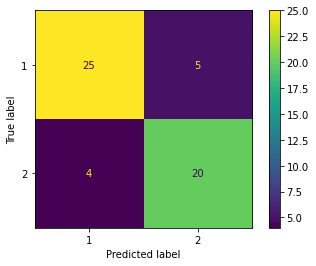

In [102]:
Evaluate_Model(Classifier_DT, "DT",X_train ,X_test,y_train,y_test)

KNN

KNN


Model accuracy(in %) for Training: 0.7592592592592593
Model accuracy(in %) for Testing: 0.7037037037037037


Sensitivity:  0.7
Specificty:  0.7083333333333334
Precision:  0.75
Recall:  0.7
F1:  0.7241379310344827


Sensitivity: [0.01296296 0.01311728]
Specificity:  [0.01311728 0.01296296]


Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.70      0.72        30
           2       0.65      0.71      0.68        24

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54



Overall Accurancy for KNN :  0.7037037037037037


Confusion Matrix


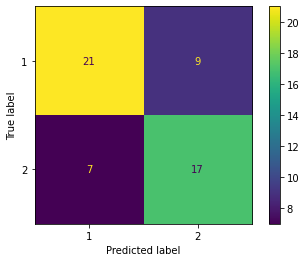

In [103]:
Evaluate_Model(Classifier_KNN, "KNN",X_train ,X_test,y_train,y_test)

Feature Selection

In [104]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

DT

                                   feature_idx  \
1                                         (2,)   
2                                       (1, 2)   
3                                   (1, 2, 10)   
4                               (1, 2, 10, 11)   
5                            (1, 2, 6, 10, 11)   
6                        (2, 6, 8, 10, 11, 12)   
7                     (1, 2, 6, 8, 10, 11, 12)   
8                  (2, 3, 6, 7, 9, 10, 11, 12)   
9               (0, 2, 3, 6, 7, 9, 10, 11, 12)   
10           (0, 1, 2, 3, 6, 7, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.25, -0.23255813953488372, -0.2093023255813... -0.226744   
2   [-0.25, -0.23255813953488372, -0.2093023255813... -0.226744   
3   [-0.22727272727272727, -0.18604651162790697, -... -0.184989   
4   [-0.20454545454545456, -0.1

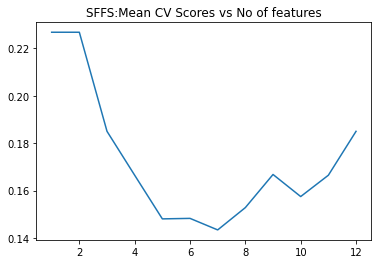

In [130]:
sffs = sfs(Classifier_DT, k_features=(1,13), forward=True, floating=True,  scoring='neg_mean_squared_error',cv = 5)
# Fit a model
sffs = sffs.fit(X_train.to_numpy(), y_train.to_numpy())
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute mean validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores'])) 

m=np.arange(1,13)
# Plot the cross validation score vs number of features
fig3=plt.plot(m,n)
fig3=plt.title('SFFS:Mean CV Scores vs No of features')
fig3.figure.savefig('DT.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print("No of features=",idx)
#Get the features indices for the best forward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print('\n')
print("*************************************************************************")
print('\n')
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print('\n')
print(x.columns[b])

In [131]:
df  = Data.reindex(columns= ['Column2', 'Column3', 'Column6', 'Column7', 'Column9', 'Column11',
       'Column12', 'Column13','Column14'])
df.head()

,Column2,Column3,Column6,Column7,Column9,Column11,Column12,Column13,Column14
0,1,4,0,2,0,2,3,3,2
1,0,3,0,2,0,2,0,7,1
2,1,2,0,0,0,1,0,7,2
3,1,4,0,0,1,2,1,7,1
4,0,2,0,2,1,1,1,3,1


In [132]:
#Creating the variable x and y
xf = df.drop('Column14', axis=1)
yf = df['Column14']

In [133]:
X_trainf1, X_testf1 ,y_trainf1, y_testf1 = train_test_split(xf, yf,test_size = 0.2,shuffle = True,random_state = 0)

DT


Model accuracy(in %) for Training: 0.9444444444444444
Model accuracy(in %) for Testing: 0.7592592592592593


Sensitivity:  0.7333333333333333
Specificty:  0.7916666666666666
Precision:  0.8148148148148148
Recall:  0.7333333333333333
F1:  0.7719298245614035


Sensitivity: [0.01358025 0.01466049]
Specificity:  [0.01466049 0.01358025]


Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.73      0.77        30
           2       0.70      0.79      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



Overall Accurancy for DT :  0.7592592592592593


Confusion Matrix


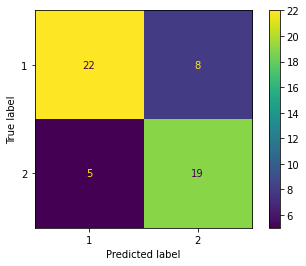

In [134]:
Evaluate_Model(Classifier_DT, "DT",X_trainf1,X_testf1,y_trainf1,y_testf1)

KNN

                                   feature_idx  \
1                                        (11,)   
2                                      (1, 11)   
3                                   (1, 9, 11)   
4                                (2, 8, 9, 11)   
5                            (2, 8, 9, 11, 12)   
6                         (2, 6, 8, 9, 11, 12)   
7                     (2, 6, 8, 9, 10, 11, 12)   
8                  (1, 2, 6, 8, 9, 10, 11, 12)   
9               (1, 2, 5, 6, 8, 9, 10, 11, 12)   
10           (1, 2, 3, 5, 6, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.36363636363636365, -0.27906976744186046, -...  -0.28203   
2   [-0.2727272727272727, -0.20930232558139536, -0... -0.212685   
3   [-0.25, -0.13953488372093023, -0.1395348837209... -0.189535   
4   [-0.1590909090909091, -0.18

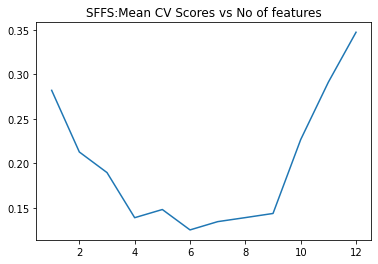

In [110]:
sffs = sfs(Classifier_KNN, k_features=(1,13), forward=True, floating=True,  scoring='neg_mean_squared_error',cv = 5)
# Fit a model
sffs = sffs.fit(X_train.to_numpy(), y_train.to_numpy())
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute mean validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores'])) 

m=np.arange(1,13)
# Plot the cross validation score vs number of features
fig3=plt.plot(m,n)
fig3=plt.title('SFFS:Mean CV Scores vs No of features')
fig3.figure.savefig('KNN.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print("No of features=",idx)
#Get the features indices for the best forward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print('\n')
print("*************************************************************************")
print('\n')
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print('\n')
print(x.columns[b])

In [111]:
df1  = Data.reindex(columns= ['Column3', 'Column9', 'Column10', 'Column12', 'Column13', 'Column14'])
df1.head()

,Column3,Column9,Column10,Column12,Column13,Column14
0,4,0,2.4,3,3,2
1,3,0,1.6,0,7,1
2,2,0,0.3,0,7,2
3,4,1,0.2,1,7,1
4,2,1,0.2,1,3,1


In [112]:
#Creating the variable x and y
xf1 = df1.drop('Column14', axis=1)
yf1 = df1['Column14']

In [113]:
X_trainf2, X_testf2 ,y_trainf2, y_testf2 = train_test_split(xf1, yf1,test_size = 0.2,shuffle = True,random_state = 0)

KNN


Model accuracy(in %) for Training: 0.8703703703703703
Model accuracy(in %) for Testing: 0.7592592592592593


Sensitivity:  0.8666666666666667
Specificty:  0.625
Precision:  0.7428571428571429
Recall:  0.8666666666666667
F1:  0.8


Sensitivity: [0.01604938 0.01157407]
Specificity:  [0.01157407 0.01604938]


Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.87      0.80        30
           2       0.79      0.62      0.70        24

    accuracy                           0.76        54
   macro avg       0.77      0.75      0.75        54
weighted avg       0.76      0.76      0.75        54



Overall Accurancy for KNN :  0.7592592592592593


Confusion Matrix


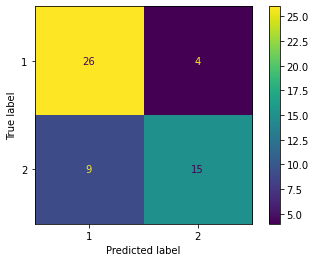

In [114]:
Evaluate_Model(Classifier_KNN ,"KNN",X_trainf2,X_testf2,y_trainf2,y_testf2)

NB

                                   feature_idx  \
1                                         (2,)   
2                                       (2, 9)   
3                                   (2, 9, 11)   
4                               (1, 2, 10, 11)   
5                            (1, 2, 8, 10, 11)   
6                         (1, 2, 6, 8, 10, 11)   
7                      (1, 2, 5, 6, 8, 10, 11)   
8                   (1, 2, 4, 5, 6, 8, 10, 11)   
9                (2, 3, 5, 6, 7, 8, 9, 11, 12)   
10           (1, 2, 3, 6, 7, 8, 9, 10, 11, 12)   
11        (1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
12     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.25, -0.23255813953488372, -0.2093023255813... -0.226744   
2   [-0.25, -0.20930232558139536, -0.1860465116279... -0.212791   
3   [-0.13636363636363635, -0.18604651162790697, -... -0.171459   
4   [-0.20454545454545456, -0.1

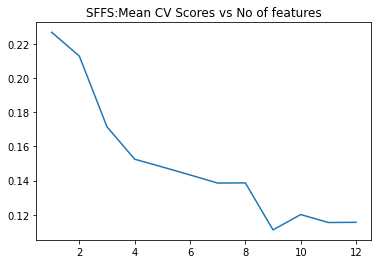

In [115]:
sffs = sfs(Classifier_NB, k_features=(1,13), forward=True, floating=True,  scoring='neg_mean_squared_error',cv = 5)
# Fit a model
sffs = sffs.fit(X_train.to_numpy(), y_train.to_numpy())
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute mean validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores'])) 

m=np.arange(1,13)
# Plot the cross validation score vs number of features
fig3=plt.plot(m,n)
fig3=plt.title('SFFS:Mean CV Scores vs No of features')
fig3.figure.savefig('NB.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print("No of features=",idx)
#Get the features indices for the best forward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print('\n')
print("*************************************************************************")
print('\n')
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print('\n')
print(x.columns[b])

In [116]:
df2  = Data.reindex(columns= ['Column2', 'Column3', 'Column5', 'Column6', 'Column7', 'Column9','Column11', 'Column12', 'Column14'])
df2.head()

,Column2,Column3,Column5,Column6,Column7,Column9,Column11,Column12,Column14
0,1,4,322,0,2,0,2,3,2
1,0,3,564,0,2,0,2,0,1
2,1,2,261,0,0,0,1,0,2
3,1,4,263,0,0,1,2,1,1
4,0,2,269,0,2,1,1,1,1


In [117]:
#Creating the variable x and y
xf2 = df2.drop('Column14', axis=1)
yf2 = df2['Column14']

In [118]:
X_trainf3, X_testf3 ,y_trainf3, y_testf3 = train_test_split(xf2, yf2,test_size = 0.2,shuffle = True,random_state = 0)

NB


Model accuracy(in %) for Training: 0.8518518518518519
Model accuracy(in %) for Testing: 0.6296296296296297


Sensitivity:  0.6333333333333333
Specificty:  0.625
Precision:  0.6785714285714286
Recall:  0.6333333333333333
F1:  0.6551724137931035


Sensitivity: [0.0117284  0.01157407]
Specificity:  [0.01157407 0.0117284 ]


Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.63      0.66        30
           2       0.58      0.62      0.60        24

    accuracy                           0.63        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.63      0.63      0.63        54



Overall Accurancy for NB :  0.6296296296296297


Confusion Matrix


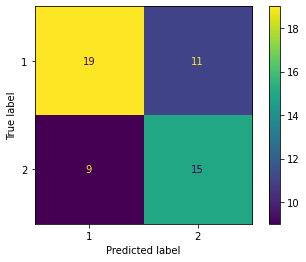

In [119]:
Evaluate_Model(Classifier_NB ,"NB",X_trainf3,X_testf3,y_trainf3,y_testf3)

LDA

                                   feature_idx  \
1                                         (2,)   
2                                      (2, 11)   
3                                   (2, 9, 11)   
4                                (2, 8, 9, 11)   
5                            (2, 8, 9, 11, 12)   
6                        (2, 8, 9, 10, 11, 12)   
7                     (2, 5, 8, 9, 10, 11, 12)   
8                  (0, 2, 5, 8, 9, 10, 11, 12)   
9               (0, 2, 3, 5, 8, 9, 10, 11, 12)   
10           (0, 2, 3, 4, 5, 8, 9, 10, 11, 12)   
11        (0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
12     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.25, -0.23255813953488372, -0.2093023255813... -0.226744   
2   [-0.25, -0.23255813953488372, -0.1162790697674... -0.212791   
3   [-0.13636363636363635, -0.20930232558139536, -... -0.162156   
4   [-0.1590909090909091, -0.16

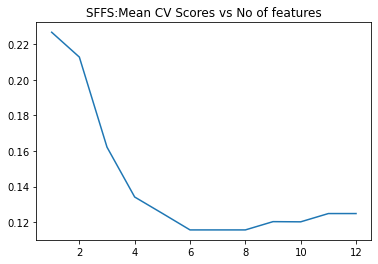

In [120]:
sffs = sfs(Classifier_LDA, k_features=(1,13), forward=True, floating=True,  scoring='neg_mean_squared_error',cv = 5)
# Fit a model
sffs = sffs.fit(X_train.to_numpy(), y_train.to_numpy())
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute mean validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores'])) 

m=np.arange(1,13)
# Plot the cross validation score vs number of features
fig3=plt.plot(m,n)
fig3=plt.title('SFFS:Mean CV Scores vs No of features')
fig3.figure.savefig('LDA.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print("No of features=",idx)
#Get the features indices for the best forward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print('\n')
print("*************************************************************************")
print('\n')
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print('\n')
print(x.columns[b])

In [121]:
df3  = Data.reindex(columns= ['Column3', 'Column9', 'Column10', 'Column12', 'Column13', 'Column14'])
df3.head()

,Column3,Column9,Column10,Column12,Column13,Column14
0,4,0,2.4,3,3,2
1,3,0,1.6,0,7,1
2,2,0,0.3,0,7,2
3,4,1,0.2,1,7,1
4,2,1,0.2,1,3,1


In [122]:
#Creating the variable x and y
xf3 = df3.drop('Column14', axis=1)
yf3 = df3['Column14']

In [123]:
X_trainf4, X_testf4 ,y_trainf4, y_testf4 = train_test_split(xf3, yf3,test_size = 0.2,shuffle = True,random_state = 0)

LDA


Model accuracy(in %) for Training: 0.8888888888888888
Model accuracy(in %) for Testing: 0.7407407407407407


Sensitivity:  0.8
Specificty:  0.6666666666666666
Precision:  0.75
Recall:  0.8
F1:  0.7741935483870969


Sensitivity: [0.01481481 0.01234568]
Specificity:  [0.01234568 0.01481481]


Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        30
           2       0.73      0.67      0.70        24

    accuracy                           0.74        54
   macro avg       0.74      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



Overall Accurancy for LDA :  0.7407407407407407


Confusion Matrix


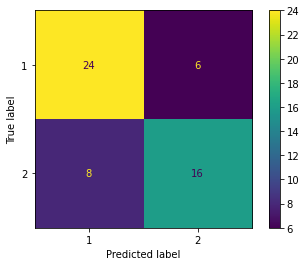

In [124]:
Evaluate_Model(Classifier_LDA ,"LDA",X_trainf4,X_testf4,y_trainf4,y_testf4)

QDA

                                   feature_idx  \
1                                         (2,)   
2                                      (2, 12)   
3                                   (0, 2, 12)   
4                                (0, 2, 3, 12)   
5                             (1, 2, 3, 7, 12)   
6                          (1, 2, 3, 6, 7, 12)   
7                      (2, 4, 7, 8, 9, 11, 12)   
8                   (1, 2, 4, 7, 8, 9, 11, 12)   
9                (1, 2, 3, 4, 7, 8, 9, 11, 12)   
10            (1, 2, 3, 4, 6, 7, 8, 9, 11, 12)   
11        (1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.25, -0.23255813953488372, -0.2093023255813... -0.226744   
2   [-0.22727272727272727, -0.2558139534883721, -0... -0.222199   
3   [-0.22727272727272727, -0.18604651162790697, -... -0.175687   
4   [-0.22727272727272727, -0.2

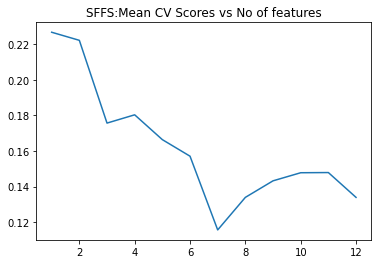

In [125]:
sffs = sfs(Classifier_QDA, k_features=(1,13), forward=True, floating=True,  scoring='neg_mean_squared_error',cv = 5)
# Fit a model
sffs = sffs.fit(X_train.to_numpy(), y_train.to_numpy())
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute mean validation scores
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores'])) 

m=np.arange(1,13)
# Plot the cross validation score vs number of features
fig3=plt.plot(m,n)
fig3=plt.title('SFFS:Mean CV Scores vs No of features')
fig3.figure.savefig('QDA.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print("No of features=",idx)
#Get the features indices for the best forward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print('\n')
print("*************************************************************************")
print('\n')
# Index the column names. 
# Features from forward fit
print("Features selected in forward fit")
print('\n')
print(x.columns[b])

In [126]:
df4  = Data.reindex(columns= ['Column2', 'Column3', 'Column4', 'Column7', 'Column8', 'Column13','Column14'])
df4.head()

,Column2,Column3,Column4,Column7,Column8,Column13,Column14
0,1,4,130,2,109,3,2
1,0,3,115,2,160,7,1
2,1,2,124,0,141,7,2
3,1,4,128,0,105,7,1
4,0,2,120,2,121,3,1


In [127]:
#Creating the variable x and y
xf4 = df4.drop('Column14', axis=1)
yf4 = df4['Column14']

In [128]:
X_trainf5, X_testf5 ,y_trainf5, y_testf5 = train_test_split(xf4, yf4,test_size = 0.2,shuffle = True,random_state = 0)

QDA


Model accuracy(in %) for Training: 0.8472222222222222
Model accuracy(in %) for Testing: 0.7407407407407407


Sensitivity:  0.7333333333333333
Specificty:  0.75
Precision:  0.7857142857142857
Recall:  0.7333333333333333
F1:  0.7586206896551724


Sensitivity: [0.01358025 0.01388889]
Specificity:  [0.01388889 0.01358025]


Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        30
           2       0.69      0.75      0.72        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



Overall Accurancy for QDA :  0.7407407407407407


Confusion Matrix


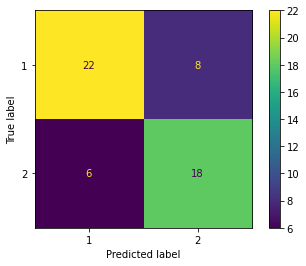

In [129]:
Evaluate_Model(Classifier_QDA ,"QDA",X_trainf5,X_testf5,y_trainf5,y_testf5)